In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torchinfo import summary
import torch.optim as optim
from torch.utils.data import DataLoader,Dataset
import torch.utils.data as data
from torchvision import transforms
import torchvision

import sys,os
sys.path.append(os.pardir)

import py_func.Deep_learning_torch_func as DL
import py_func.models_func as my_model
import py_func.dat_rb_func as drb
import py_func.my_numpy_class as mnc
import py_func.my_torch_class as mtc
import py_func.models_func as my_model

import py_func.Deep_learning_torch_func as DL
import py_func.dat_rb_func as drb

from torchinfo import summary

from torch.optim import lr_scheduler

import numpy as np
import os.path as osp
import importlib

In [2]:
mnist = mnc.My_numpy(1, '../dat/simdat/SLM_phase/1byte/lsd/m_4cm_4cm_3.3mm_notpad_4096x2400_samevalue_sclup_to8192x4800_sim.dat')
mnist.simread(70000, 4096)
print(mnist.data.shape)
#68000で学習、1000で評価, 1000でテスト
mnist.data = mnist.data.reshape(70000, 1, 4096)
print(mnist.data.shape)
mimg = mnc.My_numpy(1, '../dat/bindat/1byte/m_28_1.dat')
mimg.binread(70000, 28, 28)
mimg.data = mimg.data.reshape(70000, 1, 28, 28)
print(mimg.data.shape)

#中心1600を取り出す
data = mnist.data[:,:,int(4096/2)-int(1600/2):int(4096/2)+int(1600/2)]
print(data.shape)

myset = mtc.My_dataset(data, mimg.data)
myset.numpy2tensor()
myset.splitdata(68000, 1000)
myset.datanormalize()
myset.labelnormalize()

myset.tensor2dataset()

batch=256
mlt = DataLoader(myset.dataset_train, batch_size = batch, shuffle = True)
mlv = DataLoader(myset.dataset_val, batch_size = batch, shuffle = False)
mltest = DataLoader(myset.dataset_test, batch_size = batch, shuffle = False)

(70000, 4096)
(70000, 1, 4096)
(70000, 1, 28, 28)
(70000, 1, 1600)


In [3]:
len(mlt), len(mlv), len(mltest)

(266, 4, 4)

### 3D画像コンファレンス、シミュレーション　デコードモデル　best　評価

In [4]:
criterion = nn.MSELoss()
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

#model_ver3
#28x28出力
kernel_size = [4,4,4,4]
stride_list = [1,1,1,1]
padding_list = [4,4,2,2]
outpadding_list = [0,0,0,0]
in_channel_list = [1, 32, 64, 128]
out_channel_list = [32, 64, 128, 1]

model = my_model.decoder_allsize(1600, 1600, 40, 40, kernel_size, stride_list, padding_list,
                                        outpadding_list, in_channel_list, out_channel_list).to(device)

In [5]:
outputdir = "../output/sim/SLM_phase/decode"
outputdir = osp.join(outputdir, "MSE")
lrdir = osp.join(outputdir, "lr5e-06")
last_epochpath=osp.join(lrdir, "m68000_1600_sim_notpad_last_MSE_lr5e-06.pth")

In [6]:
model.load_state_dict(torch.load(last_epochpath))

<All keys matched successfully>

##### last epoch(3000)

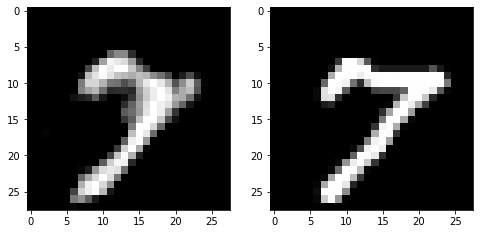

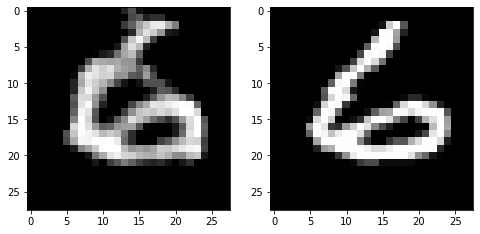

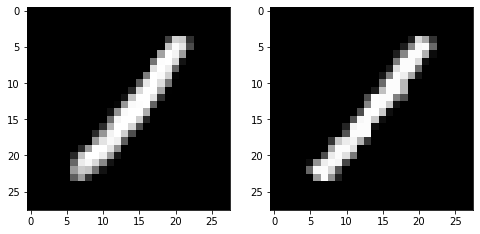

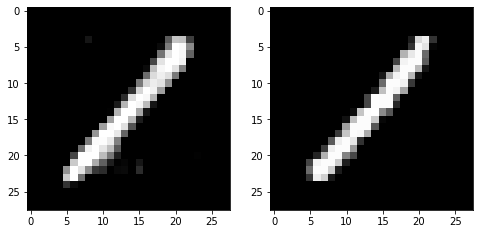

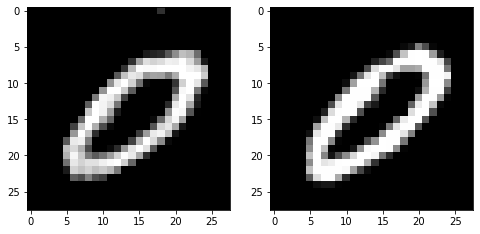

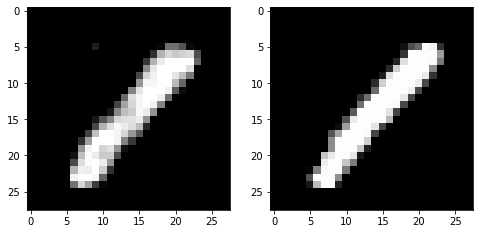

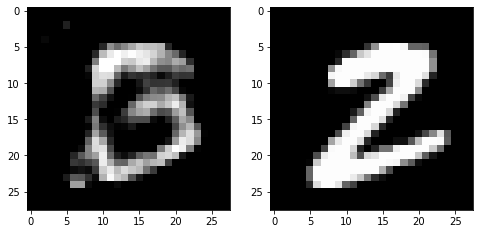

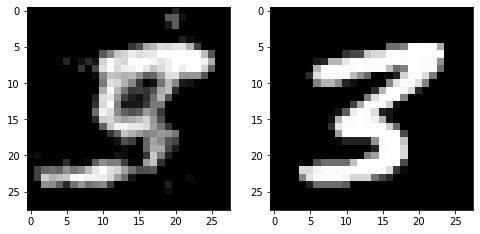

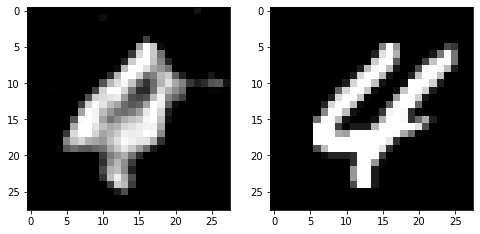

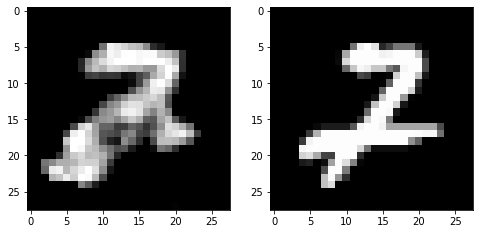

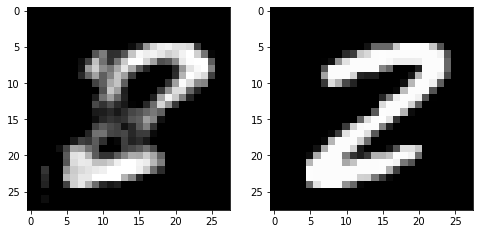

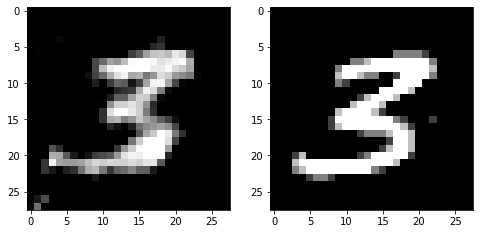

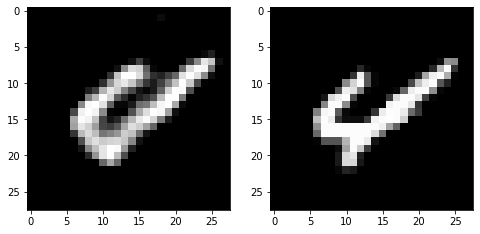

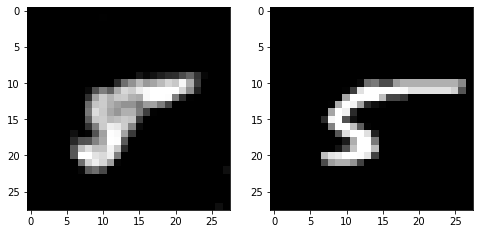

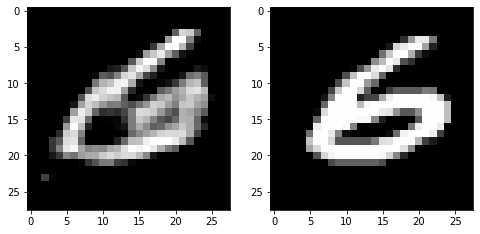

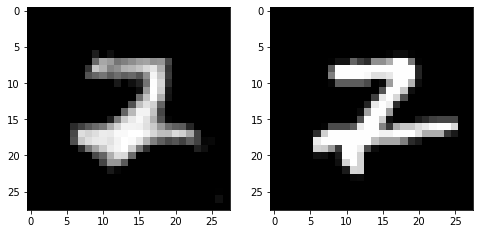

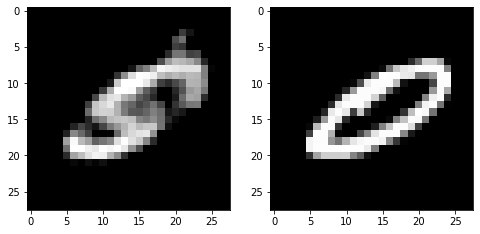

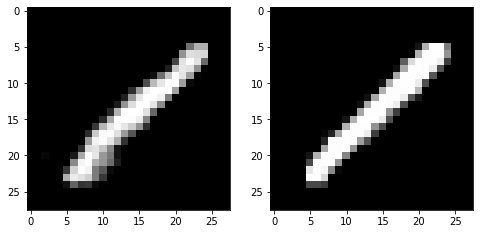

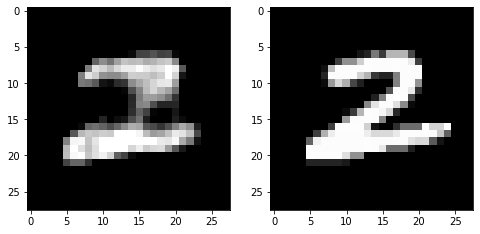

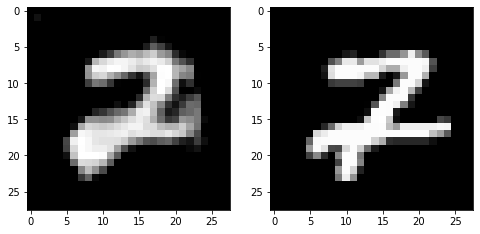

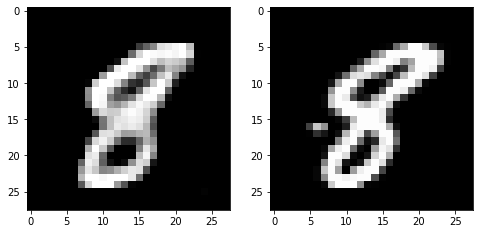

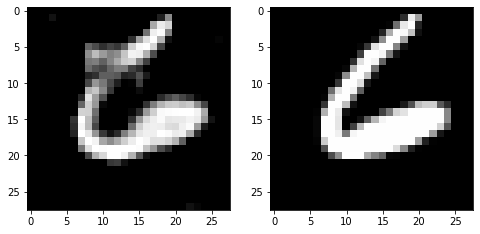

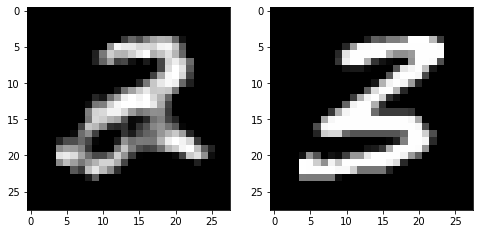

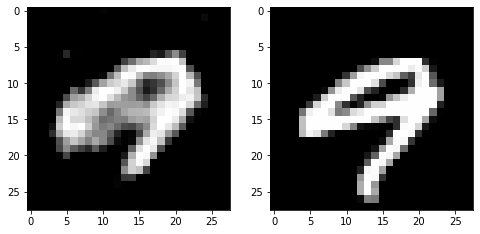

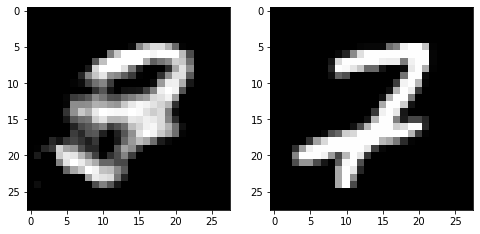

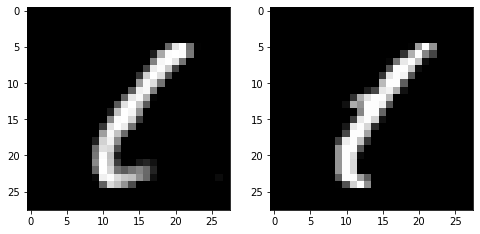

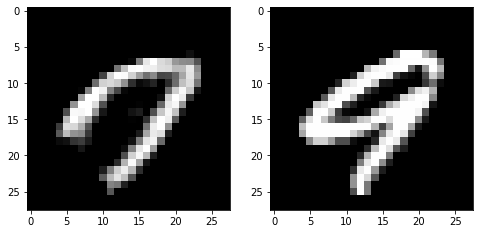

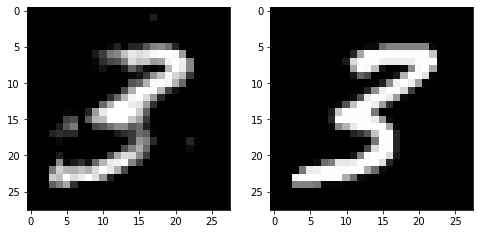

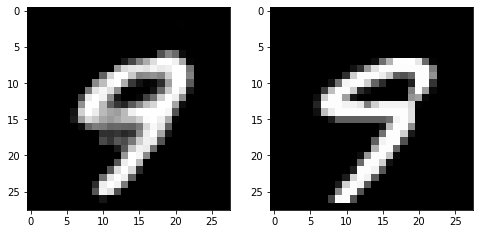

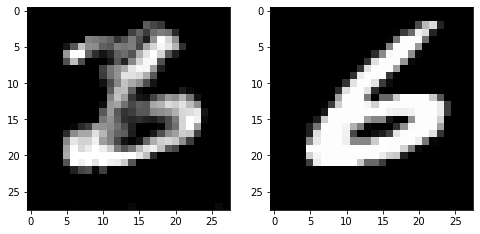

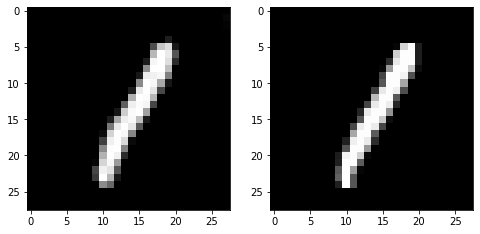

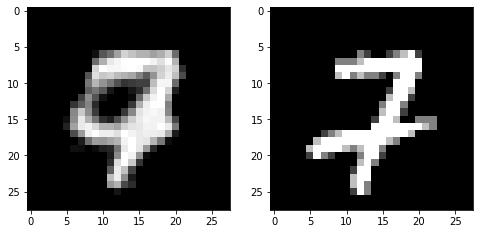

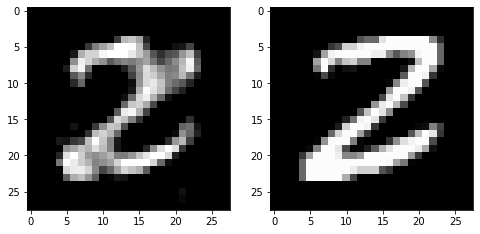

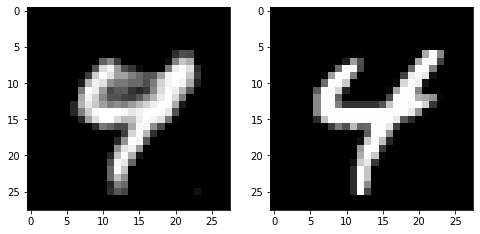

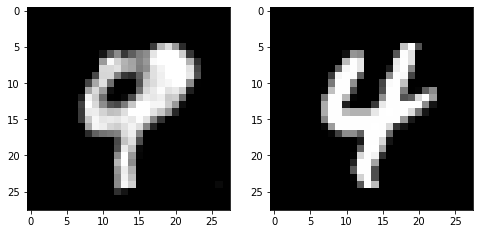

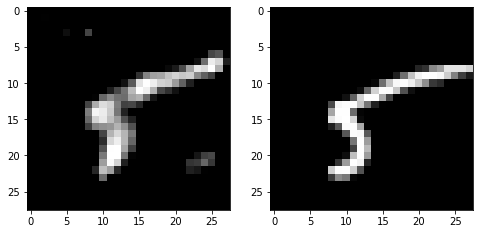

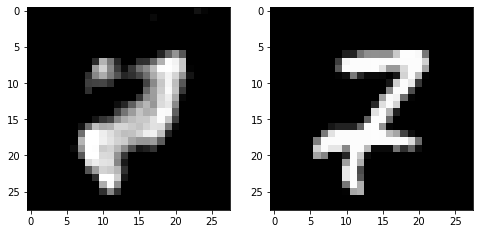

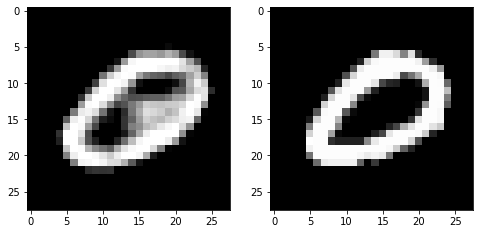

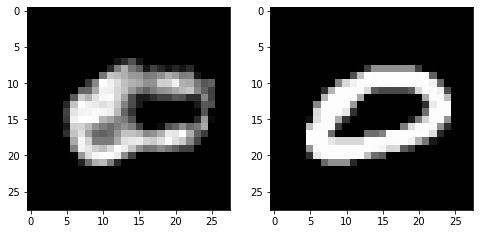

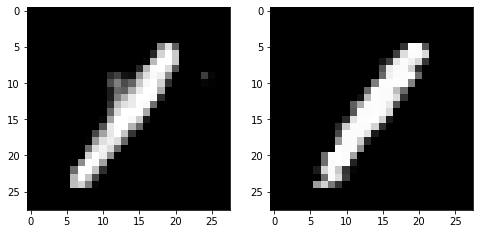

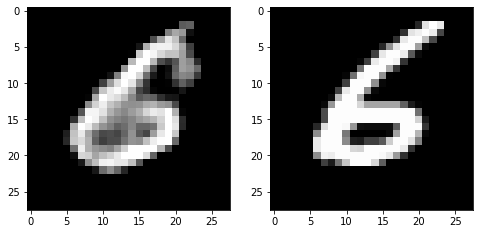

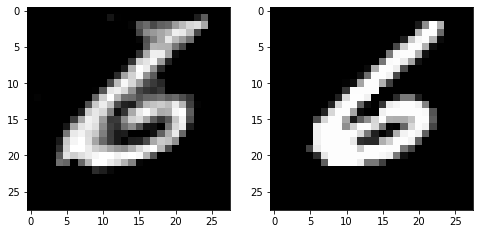

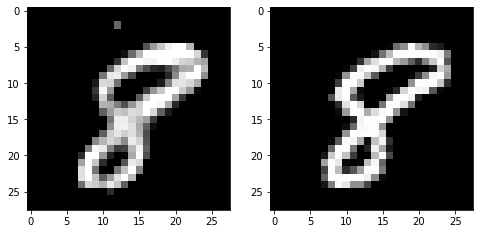

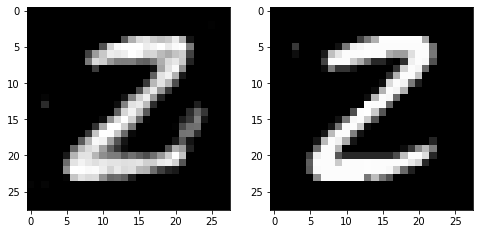

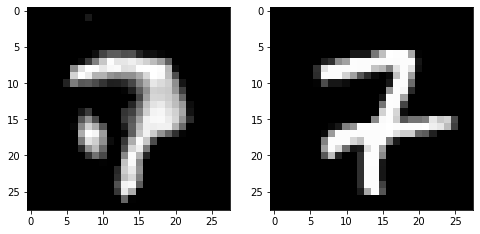

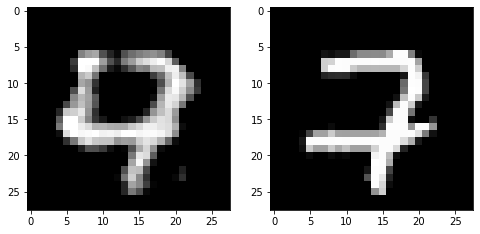

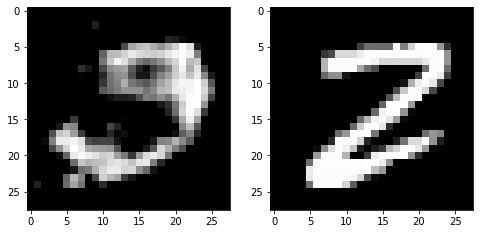

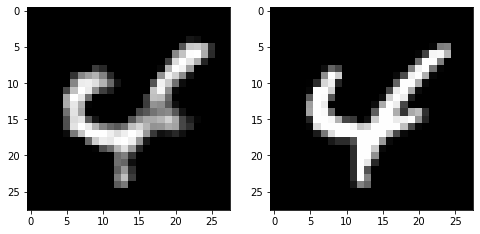

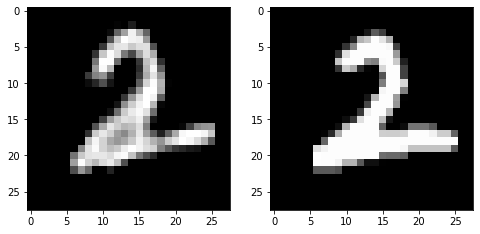

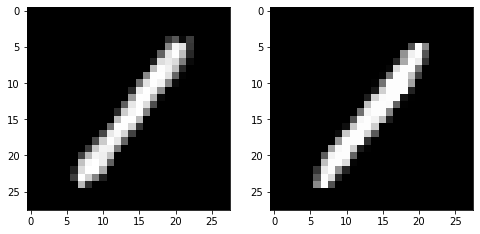

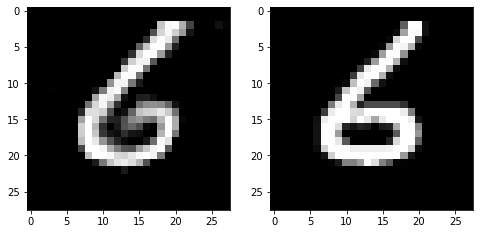

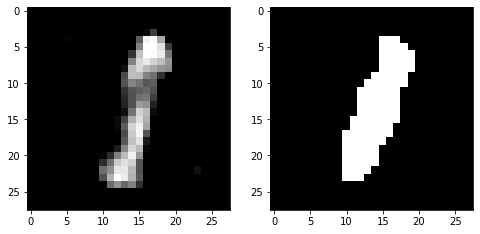

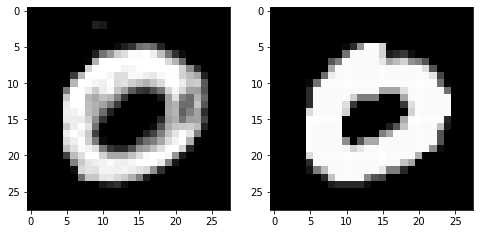

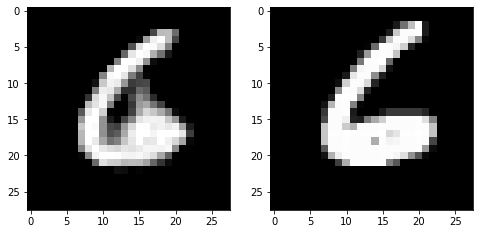

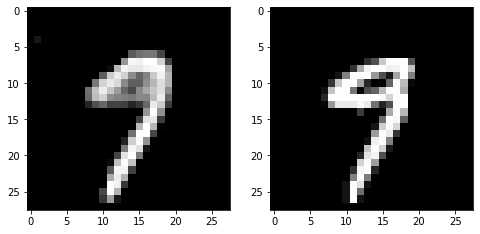

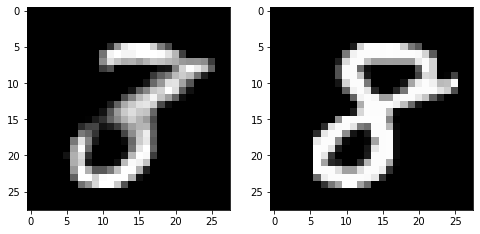

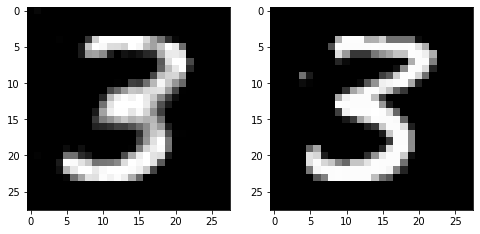

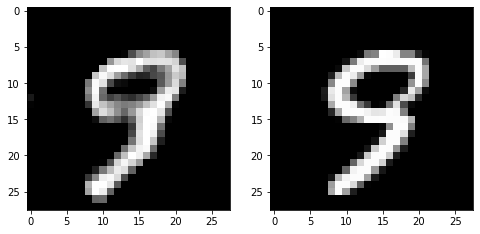

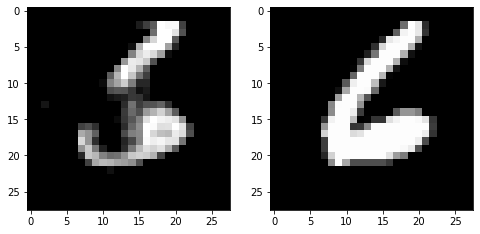

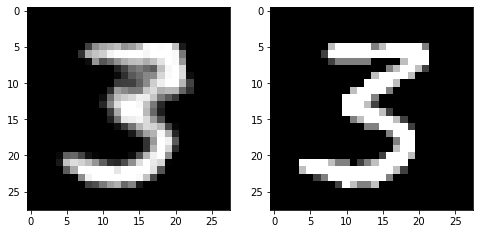

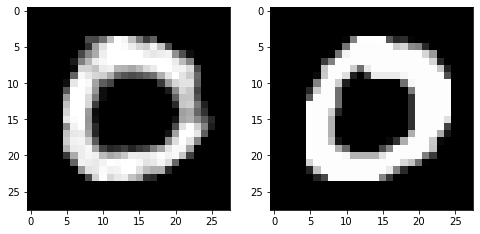

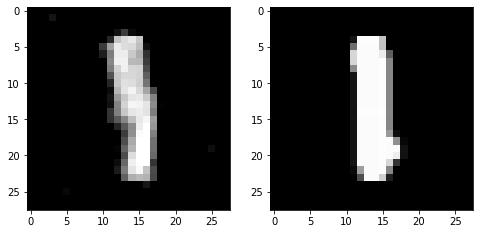

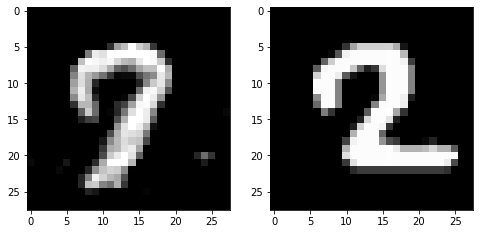

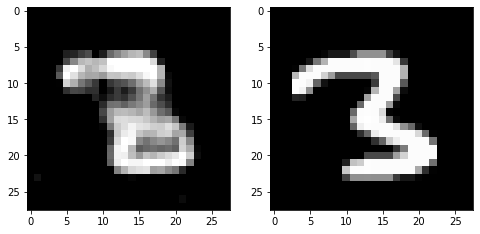

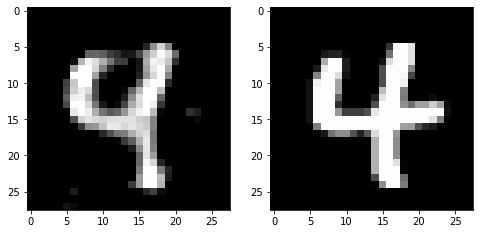

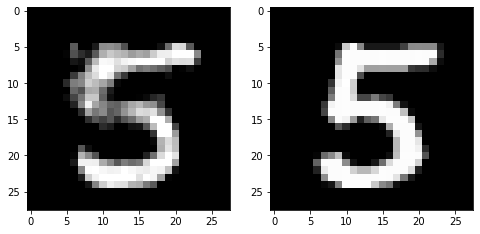

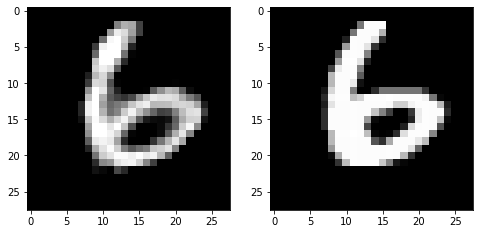

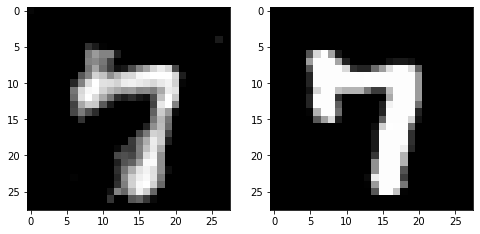

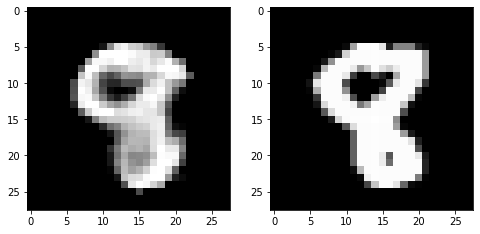

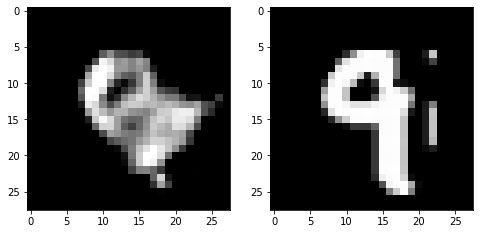

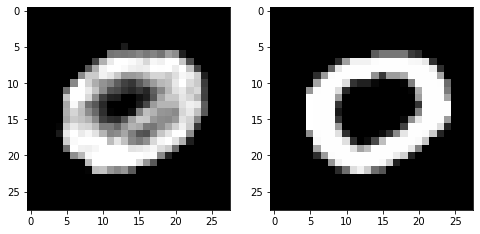

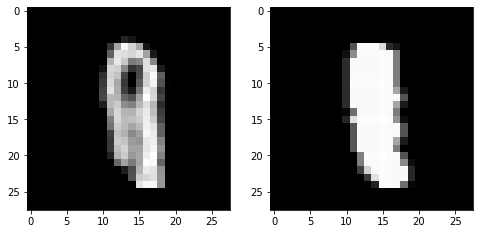

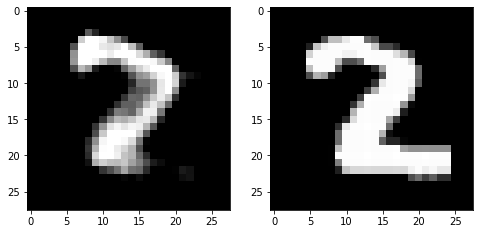

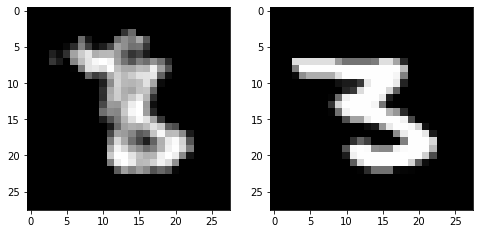

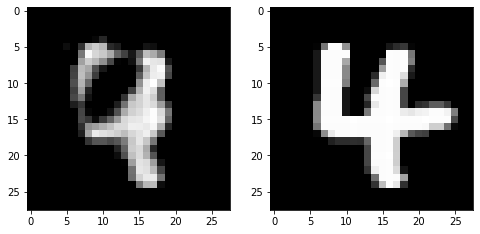

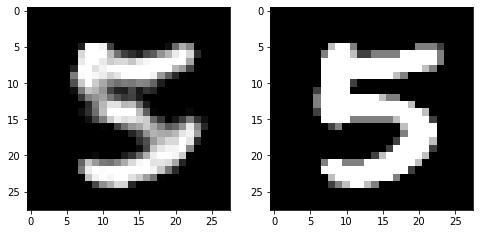

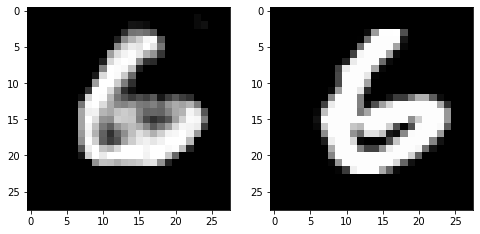

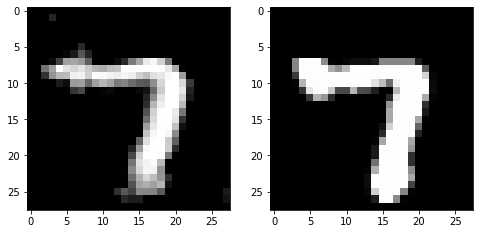

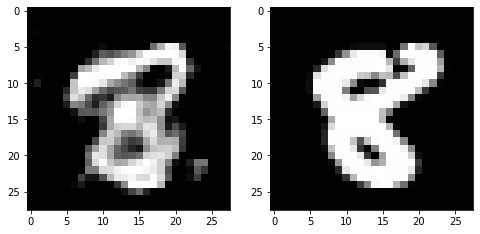

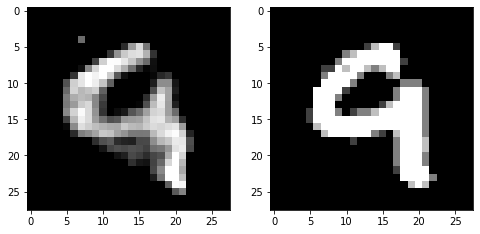

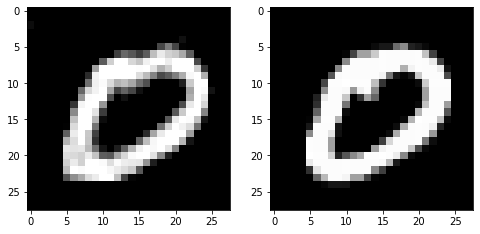

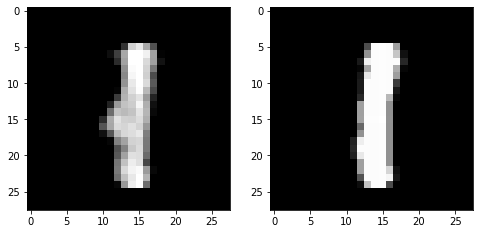

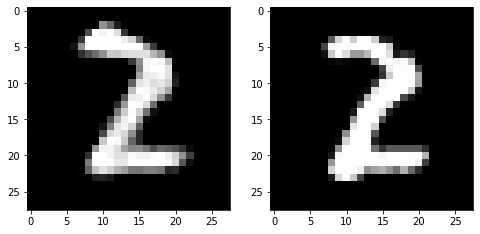

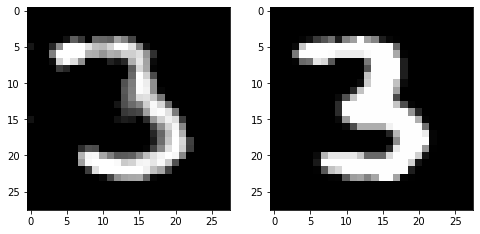

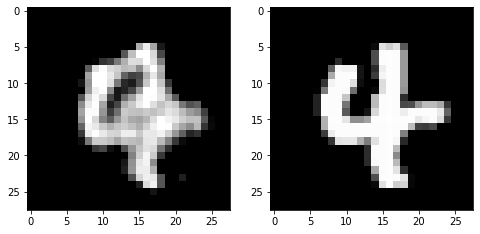

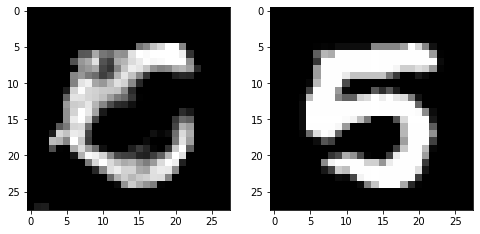

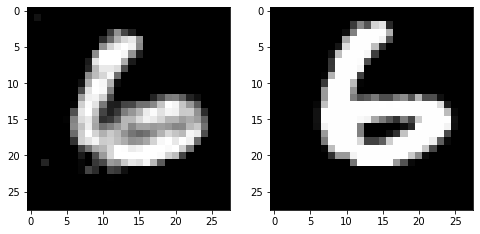

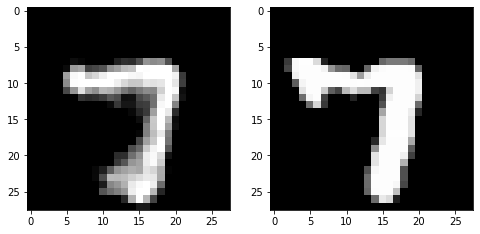

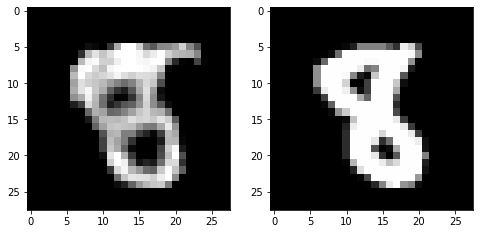

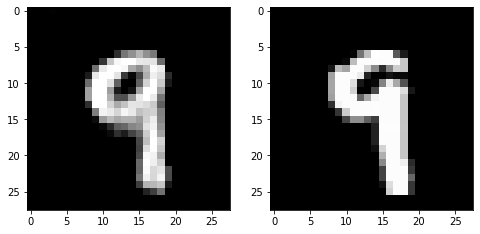

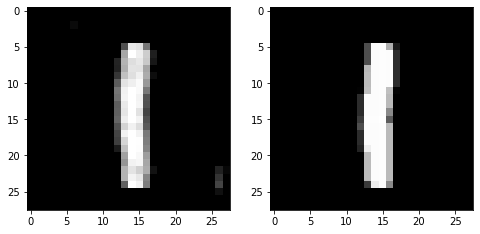

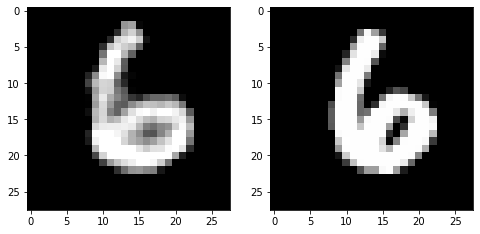

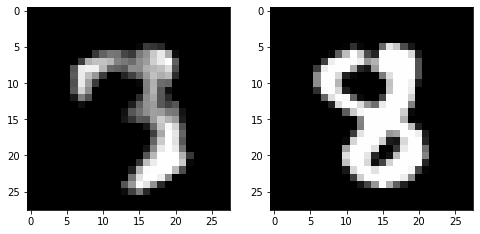

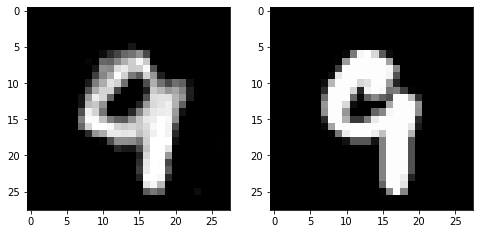

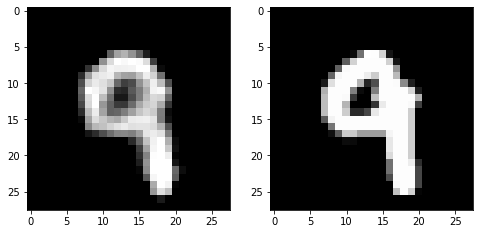

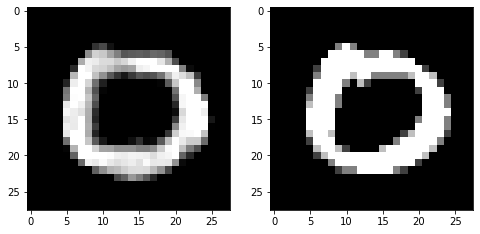

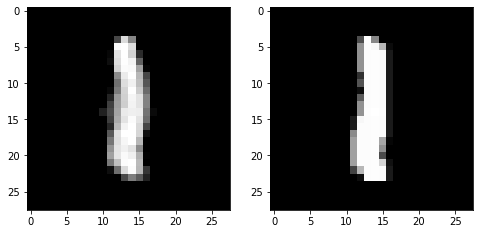

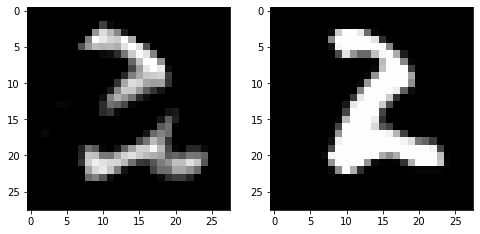

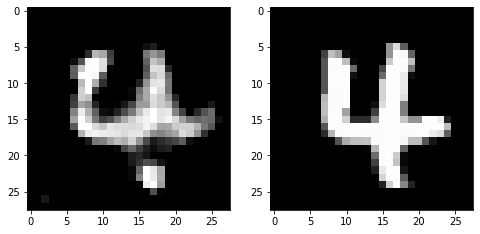

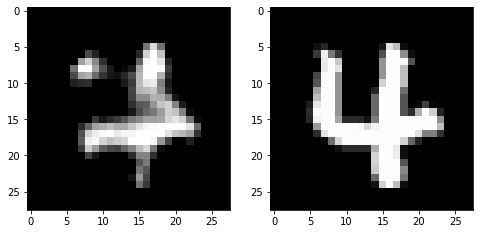

16.877227649877227


NameError: name 'ssim' is not defined

In [7]:
imgpath = osp.join(lrdir, 'img/lastepoch')
psnrs, ssims = DL.test_decode_model_and_check_img_ver3(mltest, 28, 28, model, device, 8, 4, 1, 100, imgpath, \
                                                label_array = None, datanorm = True, correctimgnorm = True)
meanpsnr = np.mean(np.array(psnrs))
meanssim = np.mean(np.array(ssims))
print(meanpsnr)


In [8]:
print(meanssim)

0.7678153662242562


##### 1000epoch

In [11]:
outputdir = "../output/sim/SLM_phase/decode"
outputdir = osp.join(outputdir, "MSE")
lrdir = osp.join(outputdir, "lr5e-06")
last_epochpath=osp.join(lrdir, "epoch1000.pth")

In [12]:
model.load_state_dict(torch.load(last_epochpath))

<All keys matched successfully>

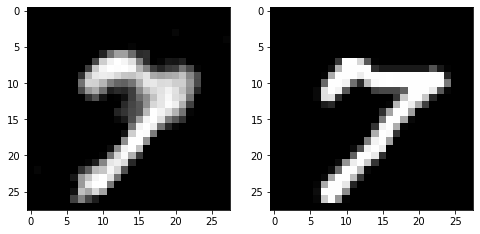

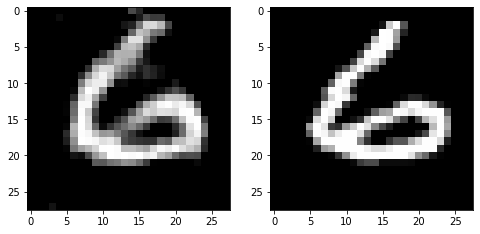

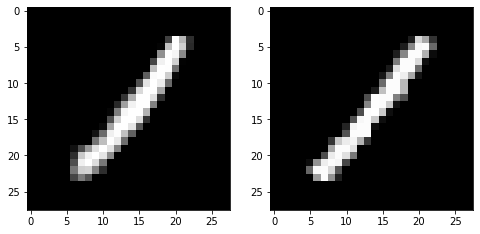

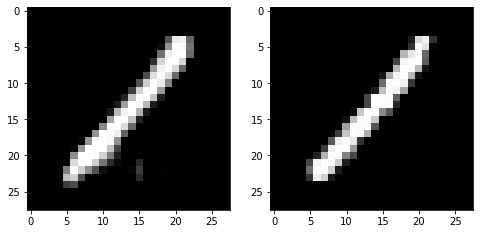

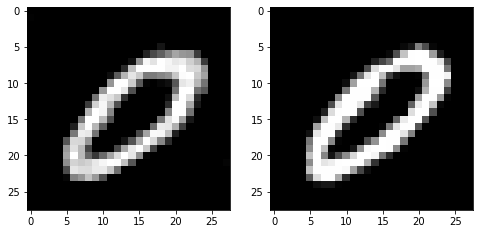

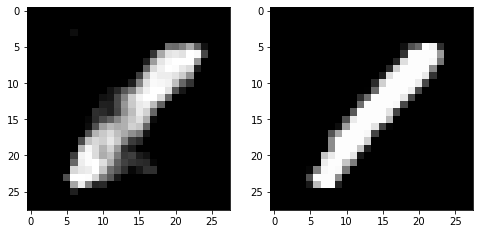

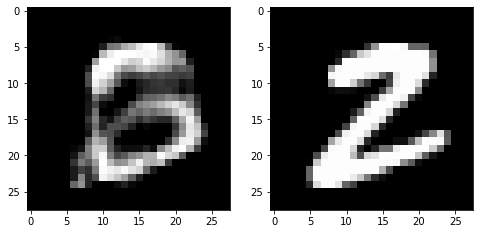

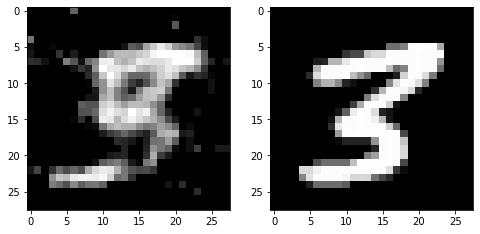

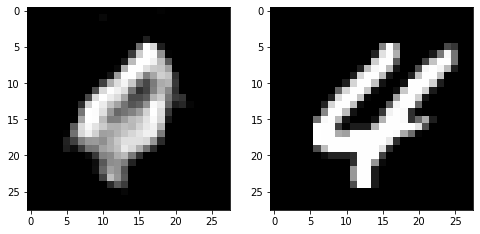

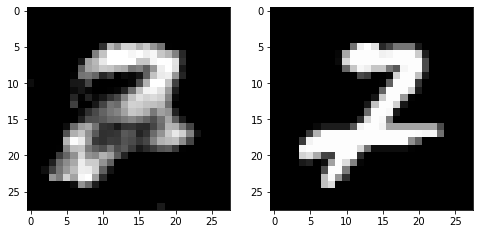

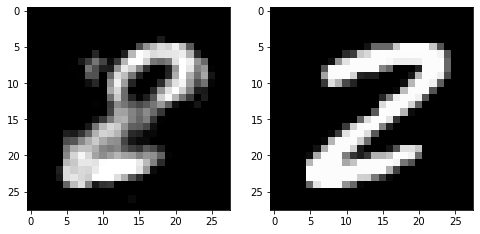

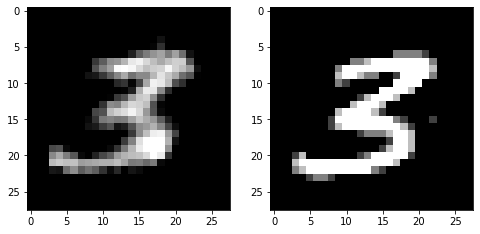

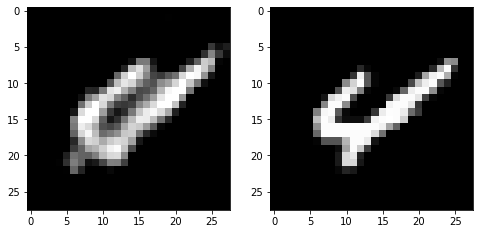

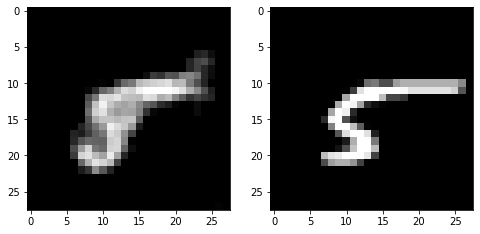

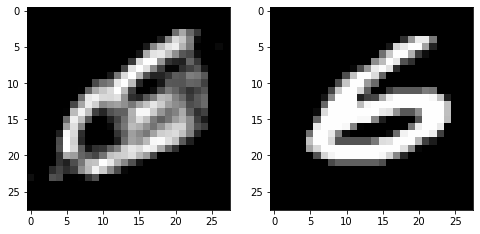

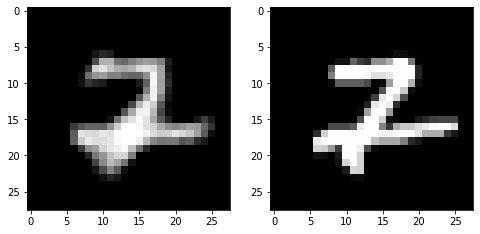

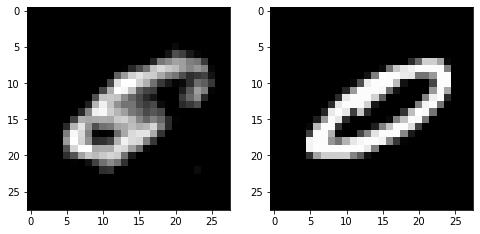

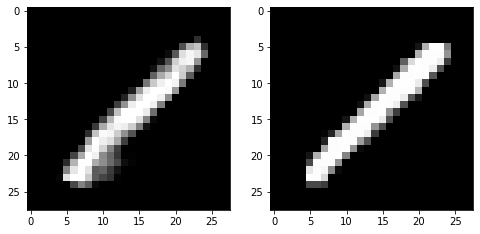

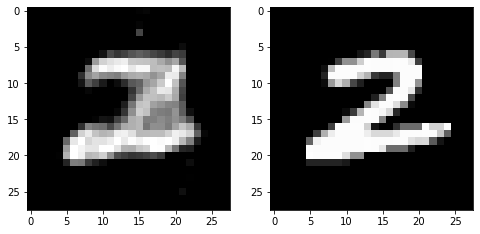

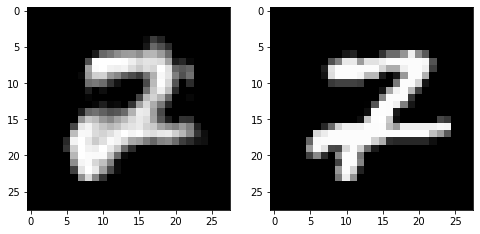

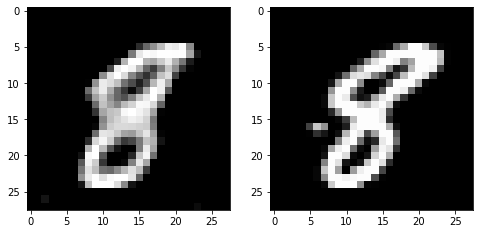

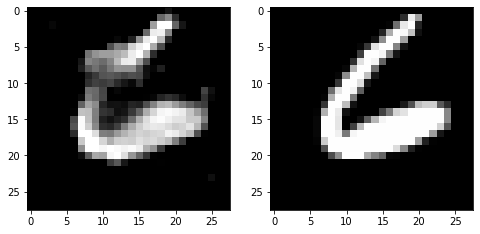

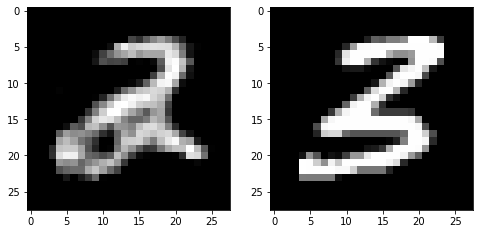

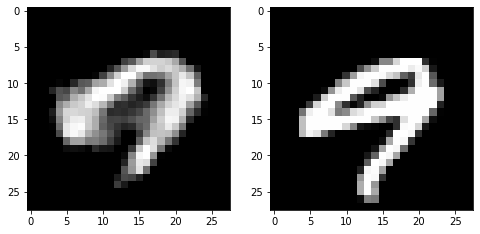

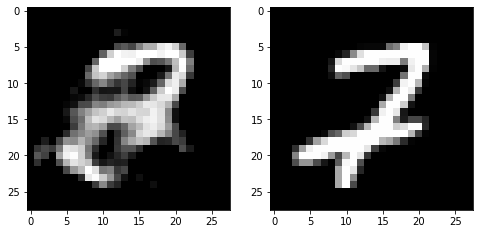

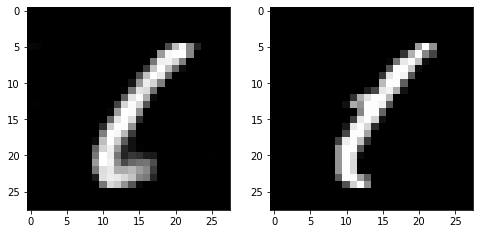

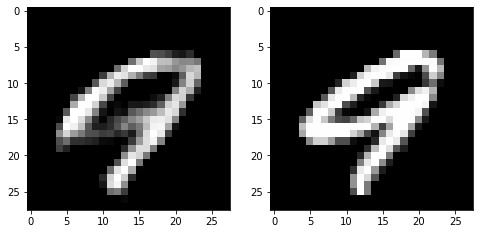

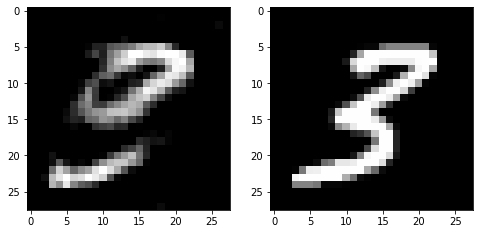

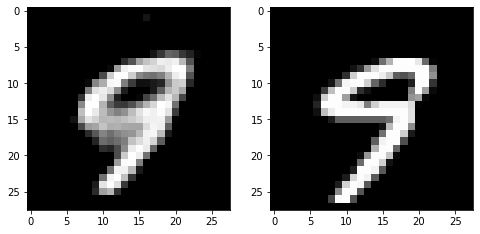

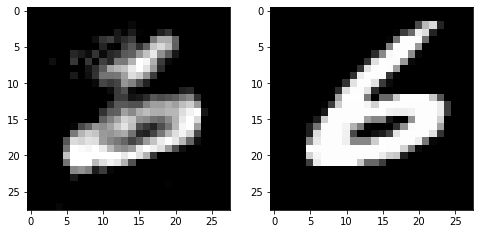

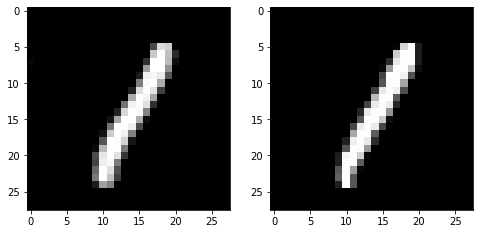

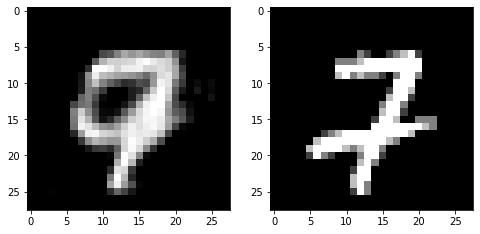

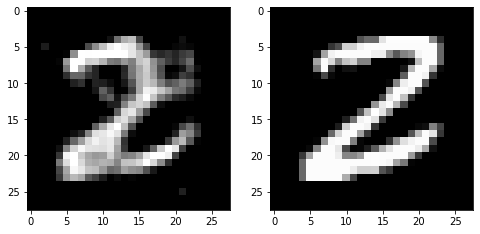

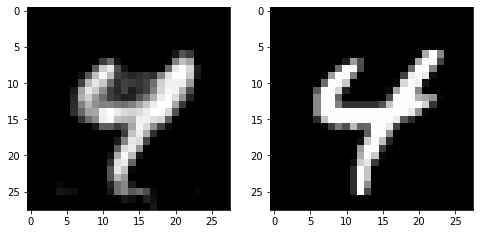

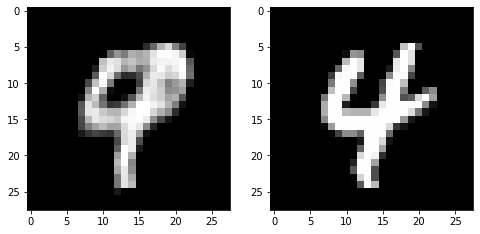

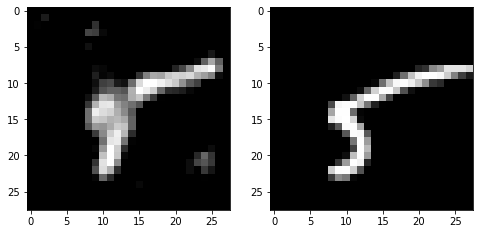

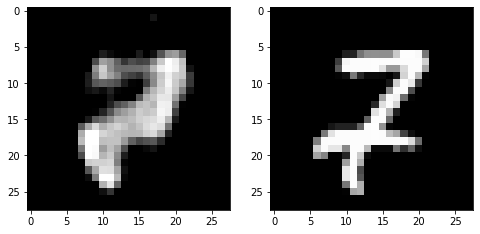

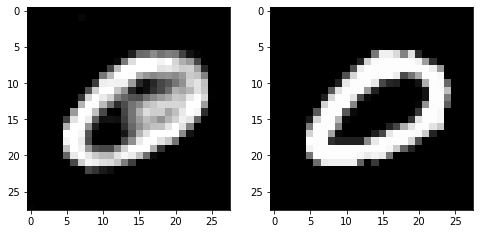

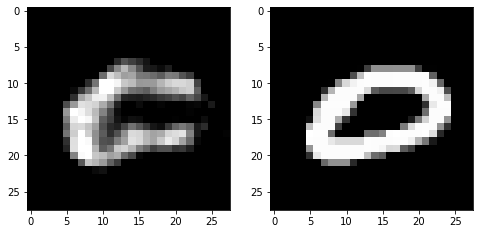

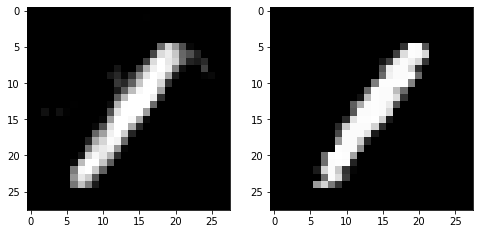

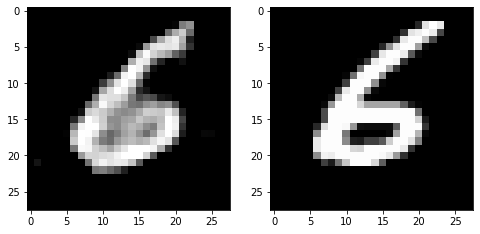

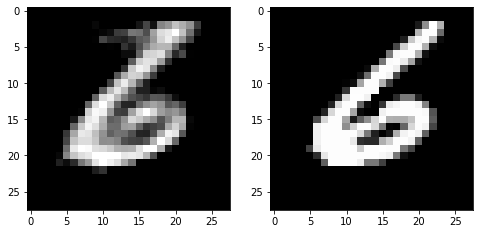

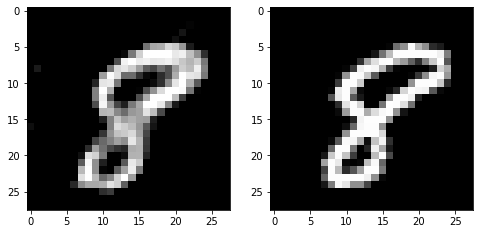

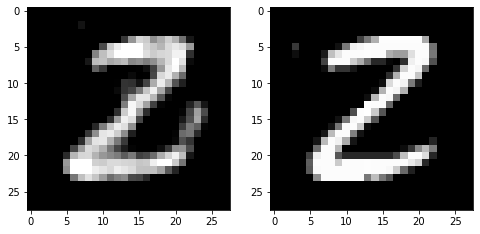

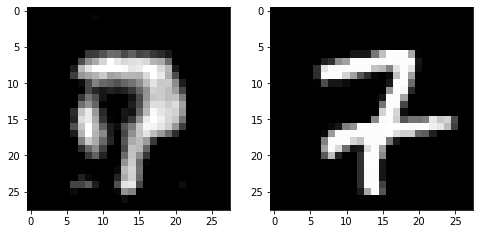

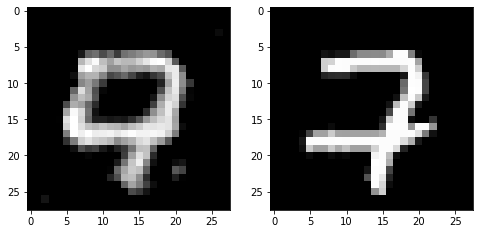

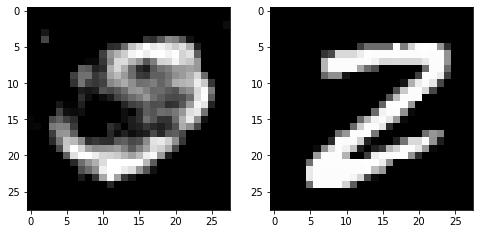

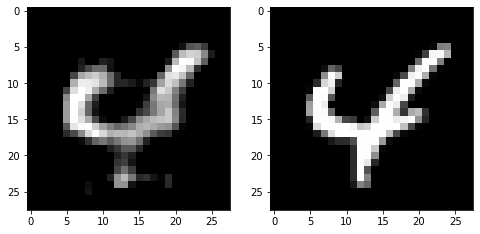

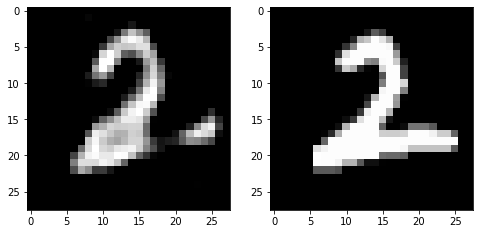

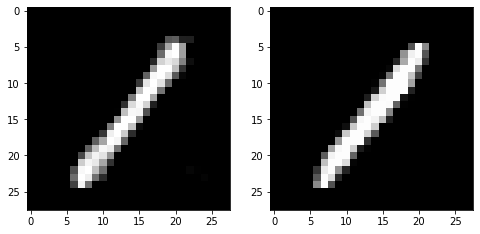

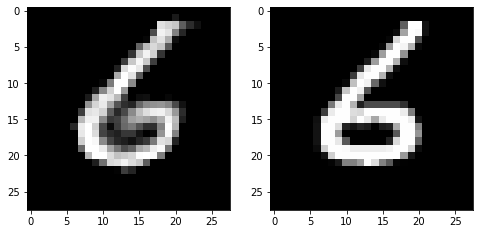

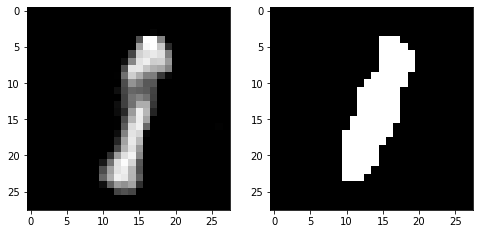

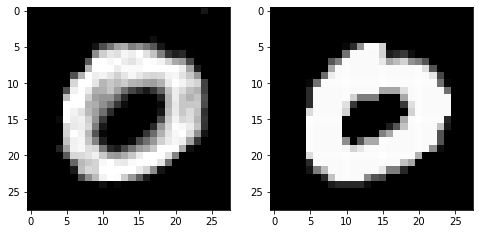

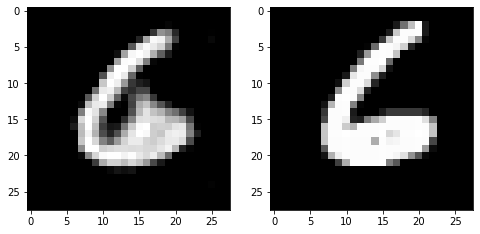

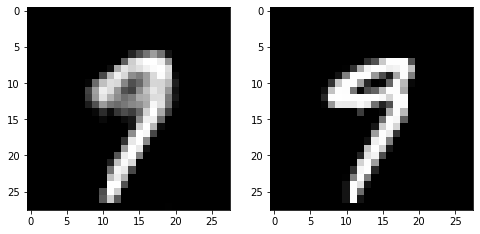

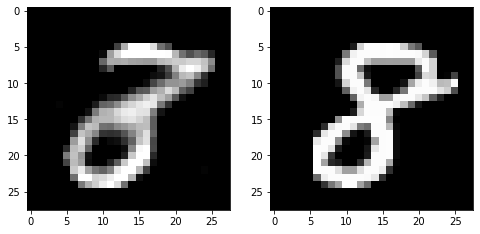

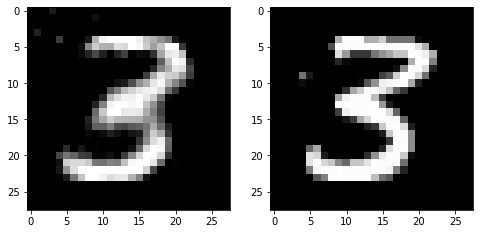

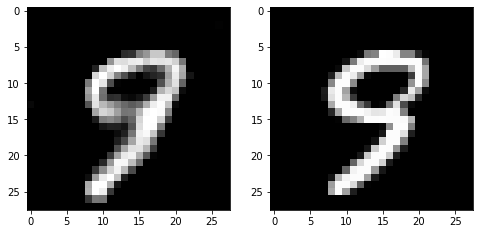

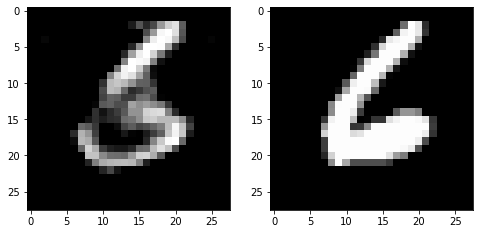

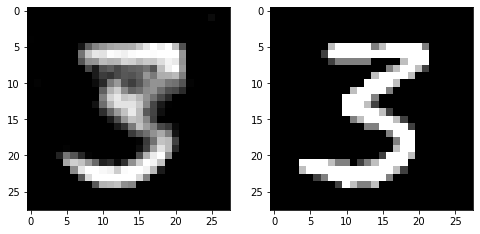

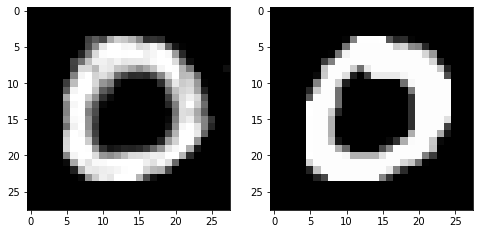

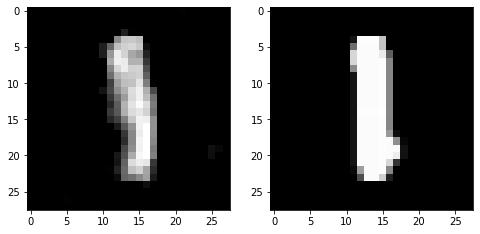

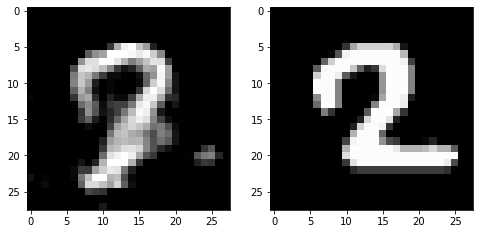

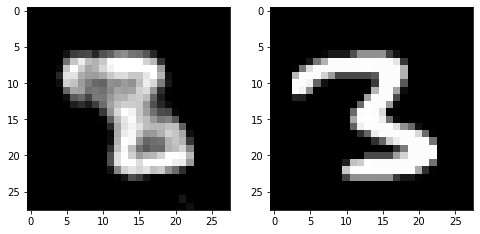

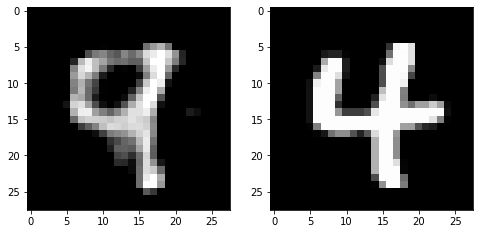

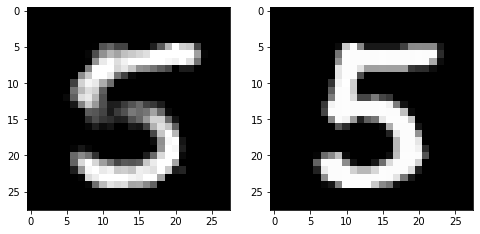

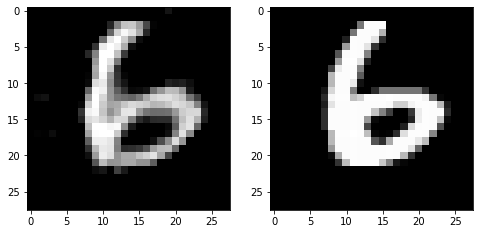

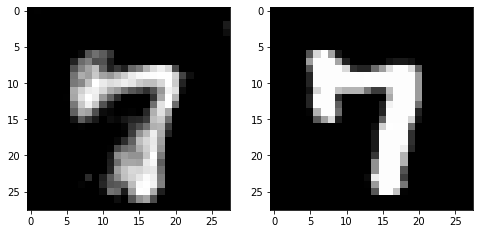

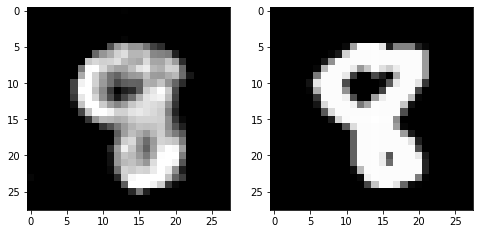

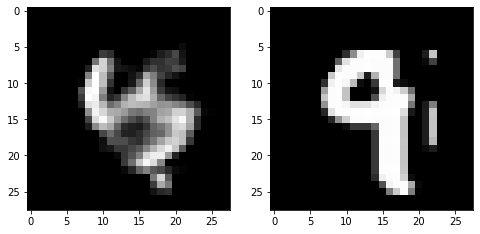

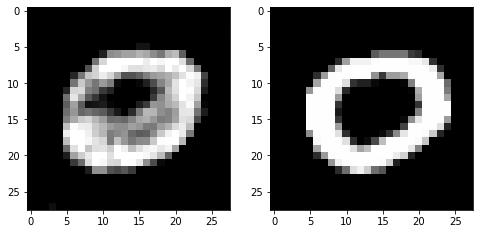

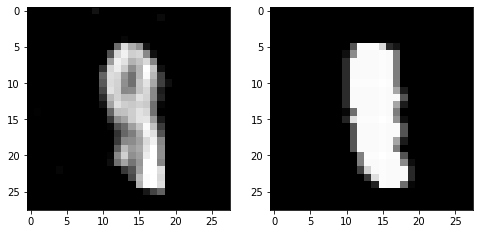

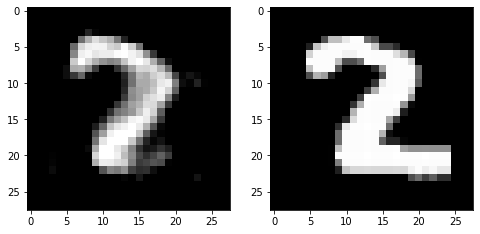

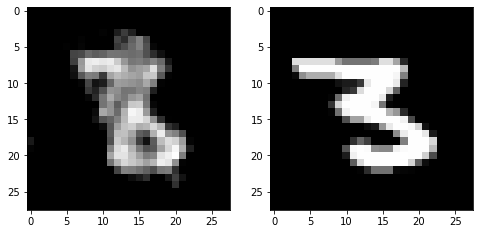

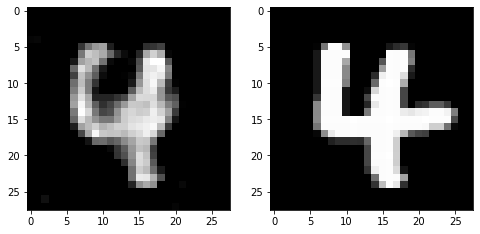

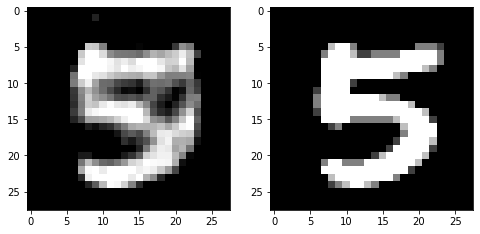

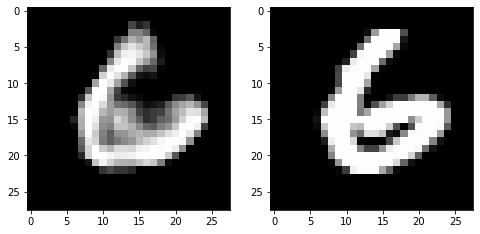

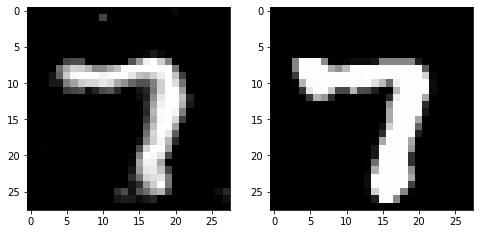

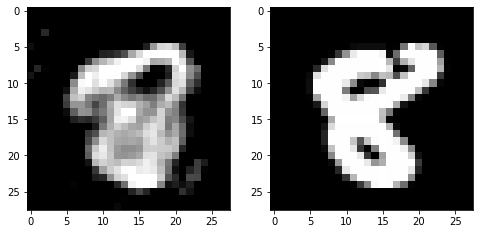

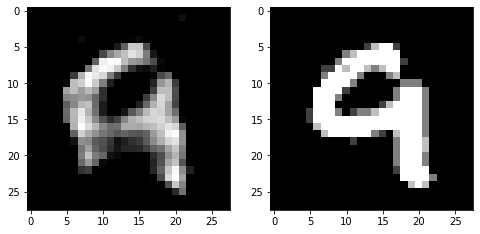

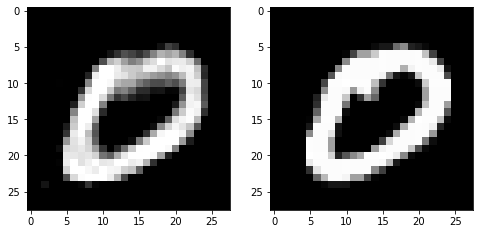

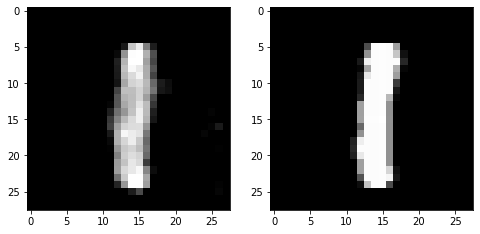

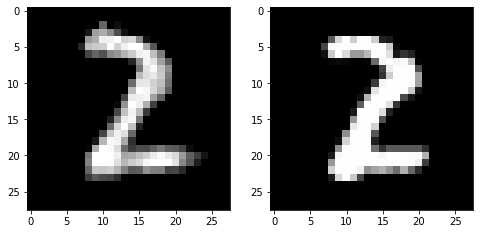

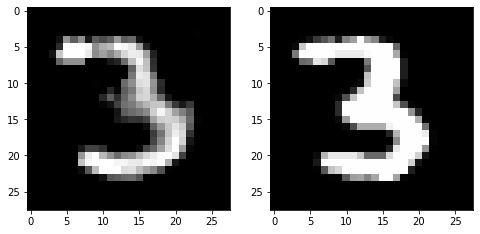

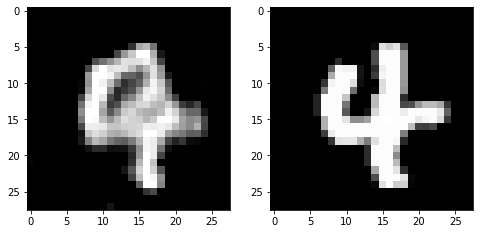

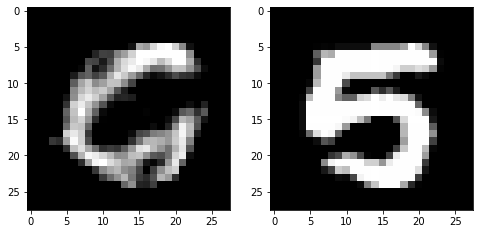

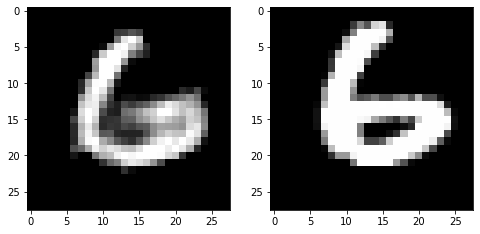

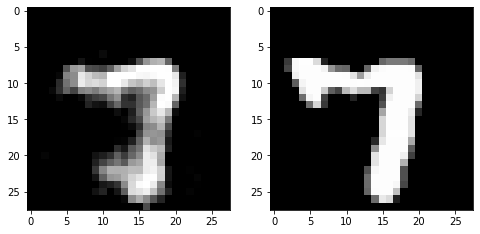

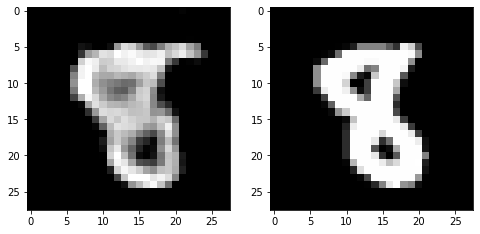

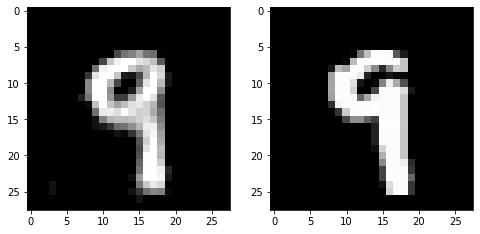

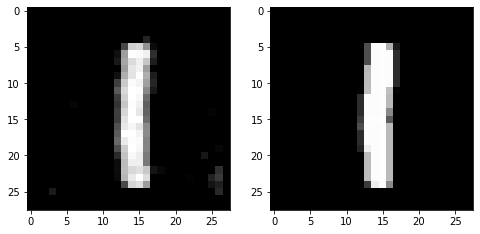

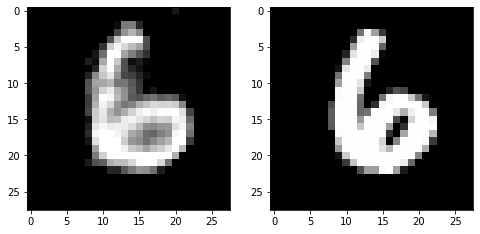

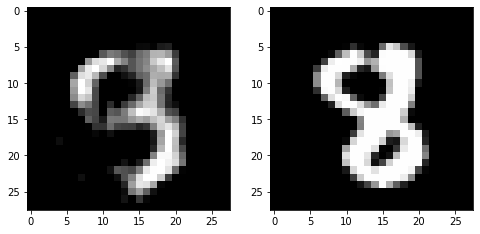

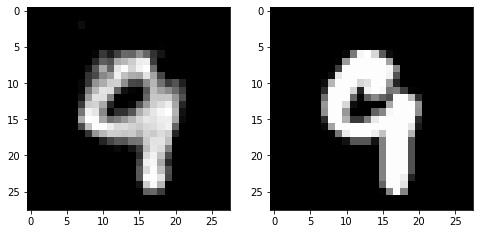

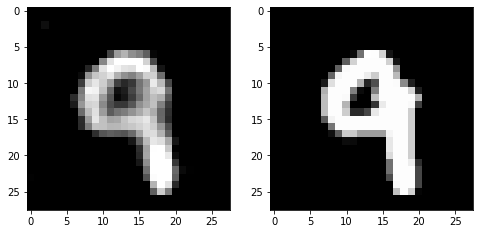

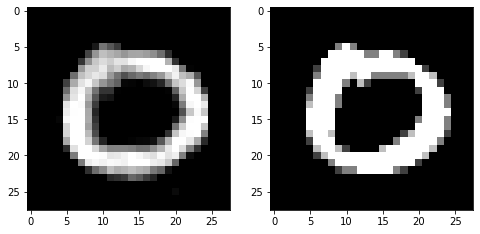

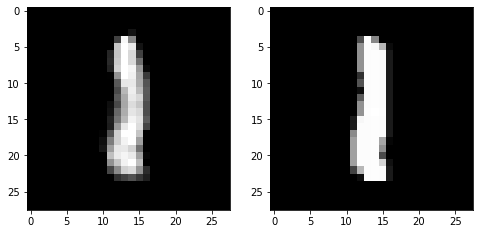

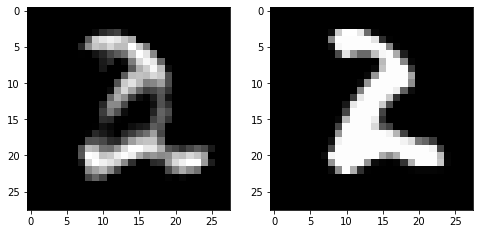

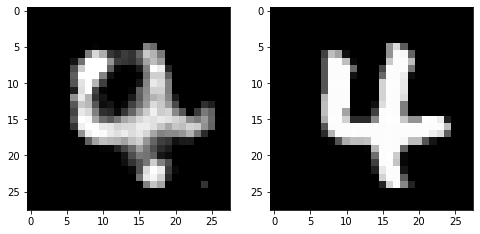

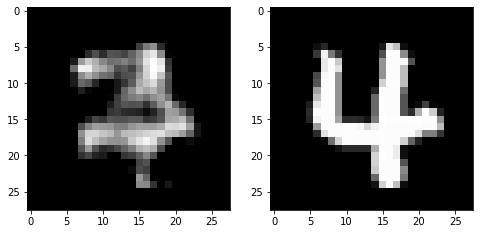

16.789668914339266
0.7572860558561559


In [13]:
imgpath = osp.join(lrdir, 'img/epoch1000')
psnrs, ssims = DL.test_decode_model_and_check_img_ver3(mltest, 28, 28, model, device, 8, 4, 1, 100, imgpath, \
                                                label_array = None, datanorm = True, correctimgnorm = True)
meanpsnr = np.mean(np.array(psnrs))
meanssim = np.mean(np.array(ssims))
print(meanpsnr)
print(meanssim)